**The dataset** is collected from UCI Machine Learning Repository through the following [link](https://archive.ics.uci.edu/ml/datasets/Parkinson%27s+Disease+Classification#)

extract data with its default name `pd_speech_features.csv` in `__data__` directory

In [4]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from pprint import pprint

In [5]:
df = pd.read_csv('./__data__/pd_speech_features.csv')
df.head()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,1,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1


In [6]:
def reset_random_seed(seed=1917):
    np.random.seed(seed)

### Preprocessing Data

* Remove nearly the same data
> pearson correlation provided by [pandas][pd.df.corr] is used
![feature correlations](./doc/images/correlation.jpg "correlation")

> For high quality image, visit [this notebook](kaggle_corr)  


[pd.df.corr]: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html
[kaggle_corr]: https://www.kaggle.com/kerneler/starter-parkinson-s-disease-pd-33cbce88-7

In [7]:
X = df.copy()
y = X.pop('class')

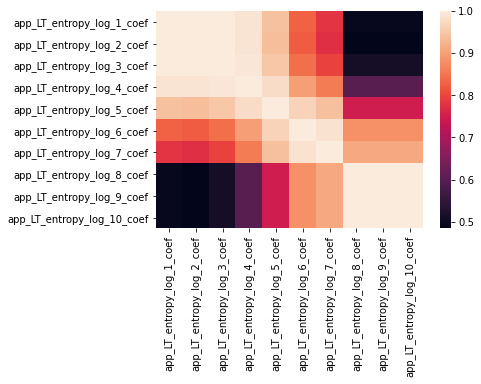

In [8]:
%matplotlib inline
app_LT_entropy_logs = [att for att in X.columns.values if att.startswith('app_LT_entropy_log')]
sns.heatmap(X[app_LT_entropy_logs].corr(), annot=False)

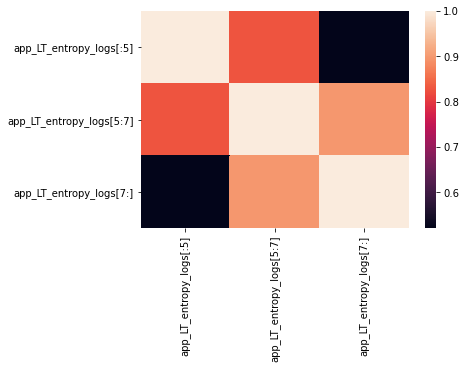

In [9]:
selected_feature = app_LT_entropy_logs[:5]
X['app_LT_entropy_logs[:5]'] = X[selected_feature].mean(numeric_only=True, axis=1)
X.drop(selected_feature, axis=1, inplace=True)

selected_feature = app_LT_entropy_logs[5:7]
X['app_LT_entropy_logs[5:7]'] = X[selected_feature].mean(numeric_only=True, axis=1)
X.drop(selected_feature, axis=1, inplace=True)

selected_feature = app_LT_entropy_logs[7:]
X['app_LT_entropy_logs[7:]'] = X[selected_feature].mean(numeric_only=True, axis=1)
X.drop(selected_feature, axis=1, inplace=True)

%matplotlib inline
app_LT_entropy_logs = [att for att in X.columns if att.startswith('app_LT_entropy_log')]
sns.heatmap(X[app_LT_entropy_logs].corr(), annot=False)


In [10]:
category = 'app_det_TKEO_mean'
selected_feature = [att for att in X.columns.values if att.startswith(category)]
selected_feature = selected_feature[3:]
X[f'{category}[3:]'] = X[selected_feature].mean(numeric_only=True, axis=1)
X.drop(selected_feature, axis=1, inplace=True)

category = 'app_TKEO_std'
selected_feature = [att for att in X.columns.values if att.startswith(category)]
selected_feature = selected_feature[3:]
X[f'{category}[3:]'] = X[selected_feature].mean(numeric_only=True, axis=1)
X.drop(selected_feature, axis=1, inplace=True)

category = 'app_LT_TKEO_mean'
selected_feature = [att for att in X.columns.values if att.startswith(category)]
selected_feature = selected_feature[4:]
X[f'{category}[4:]'] = X[selected_feature].mean(numeric_only=True, axis=1)
X.drop(selected_feature, axis=1, inplace=True)

category = 'app_LT_TKEO_std'
selected_feature = [att for att in X.columns.values if att.startswith(category)]
X[f'{category}[3:6]'] = X[selected_feature[3:6]].mean(numeric_only=True, axis=1)
X[f'{category}[6:]'] = X[selected_feature[6:]].mean(numeric_only=True, axis=1)
X.drop(selected_feature[3:], axis=1, inplace=True)


In [11]:
# Convert to data to numpy nd arrays
X = X.to_numpy()
y = y.values

### Metrics

In [14]:
from sklearn.model_selection import KFold
from sklearn.metrics import (
    accuracy_score, 
    precision_score, 
    recall_score, 
    f1_score, 
    matthews_corrcoef
)


def get_metrics(model, X, y):
    _metrics = {"accuracy": 0, "precision": 0, "recall": 0, "fMeasure": 0, "mcc": 0}
    kf = KFold(n_splits=5) # 5 fold cross validation

    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_true = y_test

        _metrics["accuracy"].append(accuracy_score(y_true, y_pred))
        _metrics["precision"].append(precision_score(y_true, y_pred))
        _metrics["recall"].append(recall_score(y_true, y_pred))
        _metrics["fMeasure"].append(f1_score(y_true, y_pred))
        _metrics["mcc"].append(matthews_corrcoef(y_true, y_pred))


    for metric in _metrics:
        current_metric = _metrics[metric]  
        _metrics[metric] = f"N({np.mean(current_metric)}, {np.std(current_metric)})"
    
    _metrics['_meta'] = {
        "nSplits": kf.get_n_splits(X),
        "modelType": type(model).__name__,
        "hyperParameters": model.get_params()
    }

    return _metrics


### Decision Tree

In [15]:
from sklearn.tree import DecisionTreeClassifier
reset_random_seed()
model = DecisionTreeClassifier(min_weight_fraction_leaf=0.1, max_features=120)
metrics = get_metrics(model, X, y)
pprint(metrics)

accuracy 3.955515859184384 3.955515859184384 0.0
precision 4.084655932775535 4.084655932775535 0.0
recall 4.624275413238066 4.624275413238066 0.0
fMeasure 4.330471299218737 4.330471299218737 0.0
mcc 1.793365502807507 1.793365502807507 0.0
{'_meta': {'hyperParameters': {'ccp_alpha': 0.0,
                               'class_weight': None,
                               'criterion': 'gini',
                               'max_depth': None,
                               'max_features': 120,
                               'max_leaf_nodes': None,
                               'min_impurity_decrease': 0.0,
                               'min_impurity_split': None,
                               'min_samples_leaf': 1,
                               'min_samples_split': 2,
                               'min_weight_fraction_leaf': 0.1,
                               'presort': 'deprecated',
                               'random_state': None,
                               'splitter': 'best

### RandomForestClassifier

In [8]:
from sklearn.ensemble import RandomForestClassifier
reset_random_seed()
model = RandomForestClassifier(bootstrap=False, n_estimators=105)
metrics = get_metrics(model, X, y)
pprint(metrics)

{'_meta': {'hyperParameters': {'bootstrap': False,
                               'ccp_alpha': 0.0,
                               'class_weight': None,
                               'criterion': 'gini',
                               'max_depth': None,
                               'max_features': 'auto',
                               'max_leaf_nodes': None,
                               'max_samples': None,
                               'min_impurity_decrease': 0.0,
                               'min_impurity_split': None,
                               'min_samples_leaf': 1,
                               'min_samples_split': 2,
                               'min_weight_fraction_leaf': 0.0,
                               'n_estimators': 105,
                               'n_jobs': None,
                               'oob_score': False,
                               'random_state': None,
                               'verbose': 0,
                               'warm_start

In [7]:
from sklearn.ensemble import GradientBoostingClassifier
reset_random_seed()
model = GradientBoostingClassifier(
    subsample=0.84, n_estimators=125, min_samples_split=20, max_features='log2'
)
metrics = get_metrics(model, X, y)
pprint(metrics)

{'_meta': {'hyperParameters': {'ccp_alpha': 0.0,
                               'criterion': 'friedman_mse',
                               'init': None,
                               'learning_rate': 0.1,
                               'loss': 'deviance',
                               'max_depth': 3,
                               'max_features': 'log2',
                               'max_leaf_nodes': None,
                               'min_impurity_decrease': 0.0,
                               'min_impurity_split': None,
                               'min_samples_leaf': 1,
                               'min_samples_split': 20,
                               'min_weight_fraction_leaf': 0.0,
                               'n_estimators': 125,
                               'n_iter_no_change': None,
                               'presort': 'deprecated',
                               'random_state': None,
                               'subsample': 0.84,
                       

In [26]:
from sklearn.svm import SVC as SVM
reset_random_seed()
model = SVM(kernel="poly", degree=1)
metrics = get_metrics(model, X, y)
table(metrics, 'kernel="poly", degree=1')

|SVC/SVM|kernel="poly", degree=1|0.746|0.853|0.746|1.0|0.0|
{'_meta': {'hyperParameters': {'C': 1.0,
                               'break_ties': False,
                               'cache_size': 200,
                               'class_weight': None,
                               'coef0': 0.0,
                               'decision_function_shape': 'ovr',
                               'degree': 1,
                               'gamma': 'scale',
                               'kernel': 'poly',
                               'max_iter': -1,
                               'probability': False,
                               'random_state': None,
                               'shrinking': True,
                               'tol': 0.001,
                               'verbose': False},
           'modelType': 'SVC',
           'nSplits': 5},
 'accuracy': 0.7460613454165215,
 'fMeasure': 0.8531922857553246,
 'mcc': 0.0,
 'precision': 0.7460613454165215,
 'recall': 1.0}


|method          | accuracy | f-measure | percision | recall | MCC |
|:------         |:--------:|:---------:|:---------:|:------:|:---:|
|SVM             | 0.732    | 0.841     | 0.751     | 0.959  |  -  |
|SVC          (T)| 0.746    | 0.853     | 0.746     | 1.0    |0.0  |
|Decision tree   | 0.720    | 0.815     | 0.808     | 0.828  |  -  |
|Decision tree(T)| 0.791    | 0.866     | 0.816     | 0.924  |0.358|
|Random Forest   | 0.832    | 0.892     | 0.842     | 0.951  |  -  |
|Random Forest(T)| 0.839    | 0.897     | 0.847     | 0.956  |0.521|
|XGBoost         | 0.841    | 0.896     | 0.857     | 0.939  |  -  |
|XGBoost      (T)|**0.86**  | 0.909     | 0.862     | 0.963  |0.598|
|[paper][link]   | 0.86     | 0.84      |   -       |    -   | 0.59|

> (T) means hyper parameter tuned in this version

[link]: https://www.sciencedirect.com/science/article/abs/pii/S1568494618305799?via%3Dihub
